In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from pathlib import Path
import numpy as np
import random
import os

In [9]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def prepare_data(file_list):
    df = pd.concat((pd.read_csv(f, sep=";") for f in file_list))
    features = df.drop('ThrottleA', axis=1)
    target = df['ThrottleA']

    # Scaling
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Reshaping the input for LSTM
    scaled_features = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))
    
    return scaled_features, target, scaler

csv_path = Path(r"M:\Github\CrossCulturalDataAnalysis\TruncatedData")

my_regex = ".+CP(\d).+"
wanted_CP_number = 1

file_list = []
for file_path in csv_path.rglob('*.csv'):
    if re.match(my_regex, file_path.name):
        if re.match(my_regex, file_path.name).group(1) == str(wanted_CP_number):
            file_list.append(file_path)
            print(file_path)

scaled_features, target,scaler = prepare_data(file_list)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(scaled_features.shape[1], scaled_features.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mse')

# Early stopping  --- This seems very unstable at the current point... Need to play with it more
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(scaled_features, target, epochs=50, validation_split=0.2, callbacks=[early_stopping])


M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR01\Simulator outputs\csv\CSVScenario-CP1_Session-isr01_2022-05-31-11-44-09.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR03\Simulator outputs\csv\CSVScenario-CP1_Session-ISR03_2022-06-01-10-31-21.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR05\Simulator outputs\csv\CSVScenario-CP1_Session-ISR05_2022-06-01-14-34-44.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR07\Simulator outputs\csv\CSVScenario-CP1_Session-isr07_2022-06-01-17-10-28.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR08\Simulator outputs\csv\CSVScenario-CP1_Session-ISR08_2022-06-06-10-27-30.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR09\Simulator outputs\csv\CSVScenario-CP1_Session-ISR09_2022-06-06-12-35-44.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR10\Simulator outputs\csv\CSVScenario-CP1_Session-ISR10_2022-06-06-14-29-13.csv
M:\Github\CrossCulturalDataAnalysis\TruncatedData\ISR11\Simulator outputs\cs

16/16 [==============================] - 0s 733us/step


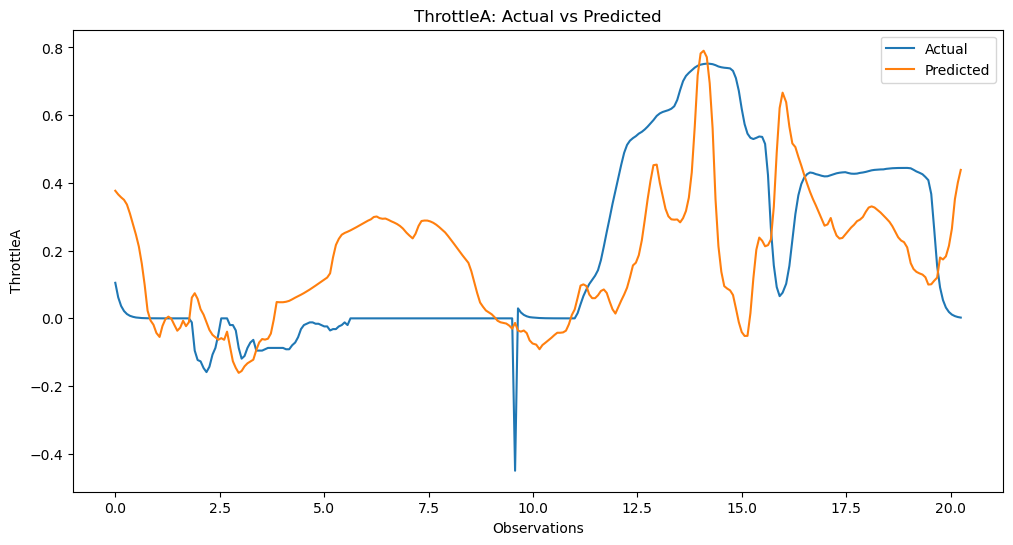

16/16 [==============================] - 0s 600us/step
[0.37684596]
[0.36598617]
[0.35738513]
[0.35003853]
[0.33617947]
[0.30942914]
[0.27748537]
[0.24731387]
[0.21194588]
[0.1618061]
[0.0984344]
[0.0225384]
[-0.00610226]
[-0.01884731]
[-0.04311779]
[-0.04311779]
[-0.05487097]
[-0.05487097]
[-0.02251264]
[-0.02251264]
[-0.00178685]
[-0.00178685]
[0.00507874]
[0.00507874]
[-0.00095306]
[-0.00095306]
[-0.01978968]
[-0.01978968]
[-0.03647307]
[-0.03647307]
[-0.02747313]
[-0.02747313]
[-0.00712875]
[-0.00712875]
[-0.02305764]
[-0.02305764]
[-0.01126867]
[-0.01126867]
[0.06128234]
[0.06128234]
[0.07426013]
[0.07426013]
[0.05760549]
[0.05760549]
[0.02694846]
[0.02694846]
[0.01083066]
[0.01083066]
[-0.01174279]
[-0.01174279]
[-0.03414448]
[-0.03414448]
[-0.04873607]
[-0.04873607]
[-0.0559746]
[-0.0559746]
[-0.06317687]
[-0.06317687]
[-0.05848141]
[-0.05848141]
[-0.06327711]
[-0.06327711]
[-0.03935085]
[-0.03935085]
[-0.08346315]
[-0.08346315]
[-0.12661843]
[-0.12661843]
[-0.14636905]
[-0.1463

In [21]:
# Load new data
new_data = pd.read_csv(r"M:\Github\CrossCulturalDataAnalysis\VerificationData\CSVScenario-CP1_Session-ISR02_2022-05-31-15-21-40.csv", sep=";")

new_features = new_data.drop('ThrottleA', axis=1)
scaled_new_features = scaler.transform(new_features)
scaled_new_features = np.reshape(scaled_new_features, (scaled_new_features.shape[0], 1, scaled_new_features.shape[1]))

new_target = new_data['ThrottleA']

# Predict
predictions = model.predict(scaled_new_features)

# Plotting the actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(df['ScenarioTime'], new_target.values, label='Actual')
plt.plot(df['ScenarioTime'], predictions, label='Predicted')
plt.title('ThrottleA: Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel('ThrottleA')
plt.legend()
plt.show()



# Predict
predictions = model.predict(scaled_new_features)

for prediction in predictions:
    print(prediction)



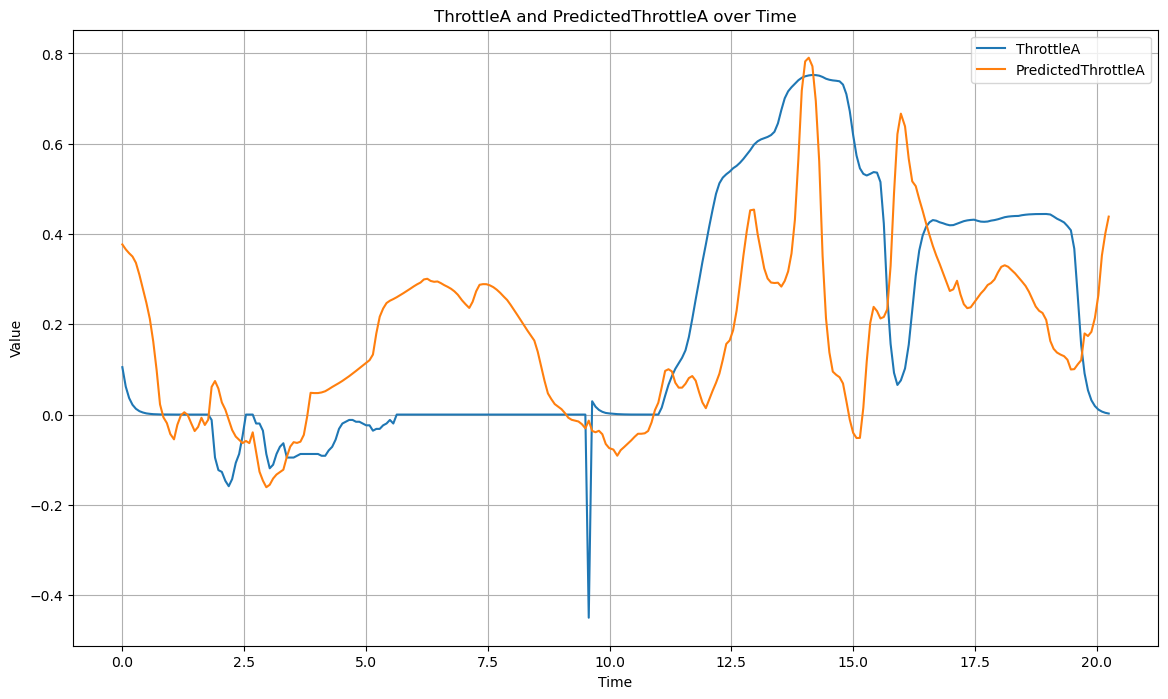

In [14]:
path = r"M:\Github\CrossCulturalDataAnalysis\VerificationData\PDCSVScenario-CP1_Session-isr01_2022-05-31-11-44-09.csv"
df = pd.read_csv(path, sep=",")

# Line plot over time
plt.figure(figsize=(14, 8))

plt.plot(df['ScenarioTime'], df['ThrottleA'], label='ThrottleA')
plt.plot(df['ScenarioTime'], df['PredictedThrottleA'], label='PredictedThrottleA')

plt.title('ThrottleA and PredictedThrottleA over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

